## IncomeClassification: Loan Approval
***
- It's established that New York City is one of the most expensive cities in the world
-college tuition can really put a dent in ones bank account 
- It would be wise to move to NYC only if a person get a loan for his/her college tuition 


- Looking into this,  a dataset which consisted of prevoious observations on Loan Predictions at PNC Bank  and whether they we were approved or not was analyzed.



Asking for  a smaller loan amount  would give  time to figure out how to get the rest of the sum and whether a person should work the summer before school or not. This is quite common amongst aspiring college students in the USA, for undergrad and grad school
 

## What type of problem is this? 
***
- As you can tell, this is a Classification problem where the Target Variable is Categorical 
    - 1: Yes (Loan Approved)
    - O: No  (Loan Not Approved)

## Direct Approach 
***
Using Decision Trees to tackle Classification problems was quick and easy way to solve this problem 



In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,0:5]
y = dataframe.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [3]:
dataframe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


**Decision Tree using the Gini Index criterion**
***
- Here checking the accuracy of the Gini Index method on our training set. 


In [3]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train,y_train)

y_prediction_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_prediction_gini)

accuracy_gini

0.7567567567567568

**Decision Tree using the Information Gain / Entropy criterion**
***
-  saw that for the Gini Index method we got an accuracy of ~75% and Information Gain/Entropy gave accuracy of ~71%

In [4]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train,y_train)
y_prediction_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_prediction_entropy)
accuracy_entropy

0.7081081081081081

## Plotting a decision tree

Decision tree can be plotted using `pydotplus`.

In [51]:
!pip install GraphViz

In [52]:
from sklearn import tree
import pydotplus
from IPython.display import Image
X = 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
y = 'Loan_Status'
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                               feature_names=X,
                               class_names=y,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [98]:
# Visualising the graph without the use of graphviz
#for visualizing tree 
from sklearn.tree import plot_tree
plt.figure(figsize = (40,20))
dec_tree = tree(decision_tree=tree, feature_names = X, 
                     class_names =y , filled = True ,fontsize=10, precision = 4, rounded = True)

plt.savefig("one.png")

TypeError: 'module' object is not callable

<Figure size 2880x1440 with 0 Axes>


Altering some parameters of Decision Tree in order to prevent over-fitting and get a better accuracy





## Approach -2 : Effect of varying max_depth
***

Choosing **Depths of 2 and 5 respectively **and then compared the results to see which is better

In [54]:
clf_1 = DecisionTreeClassifier(max_depth = 2)
clf_1.fit(X_train,y_train)

clf_2 = DecisionTreeClassifier(max_depth = 5)
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [55]:
# predicting for both max depth 2 and 5.

y_clf_1 = clf_1.predict(X_test)
y_clf_2 = clf_2.predict(X_test)

In [56]:
#calculate accuracy
accuracy_clf_1 = accuracy_score(y_test,y_clf_1)
accuracy_clf_2 = accuracy_score(y_test,y_clf_2)

In [9]:
accuracy_clf_1

0.7837837837837838

In [10]:
accuracy_clf_2

0.7783783783783784

## Better Results: 
***

-the accuracies of both these models is better than the models before ( ~ 80%) compared to 70% 



-  loan amounts in the dataset are in Thousands of dollars

- Each semester, NYU charges  $26,500 for a course
- If a person's  program is 6 semesters long and he/she needs the fees for all the 6 semesters 



## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

## Reading Train and Test data

In [12]:
data_train = pd.read_csv('../data/adult_train.csv')
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [13]:
data_test = pd.read_csv('../data/adult_test.csv')
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [14]:
# Your code here

# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

# encode target variable as integer
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

### Find the statistics of the test data and count the distribution of target variable in train data 

In [15]:
# Your code here

data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Your code here

data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

### Ploting the distribution of each feature to get a better understanding about the distribution of each feature. plot of number of values for each category feature and the histogram of the values for each continuous feature.

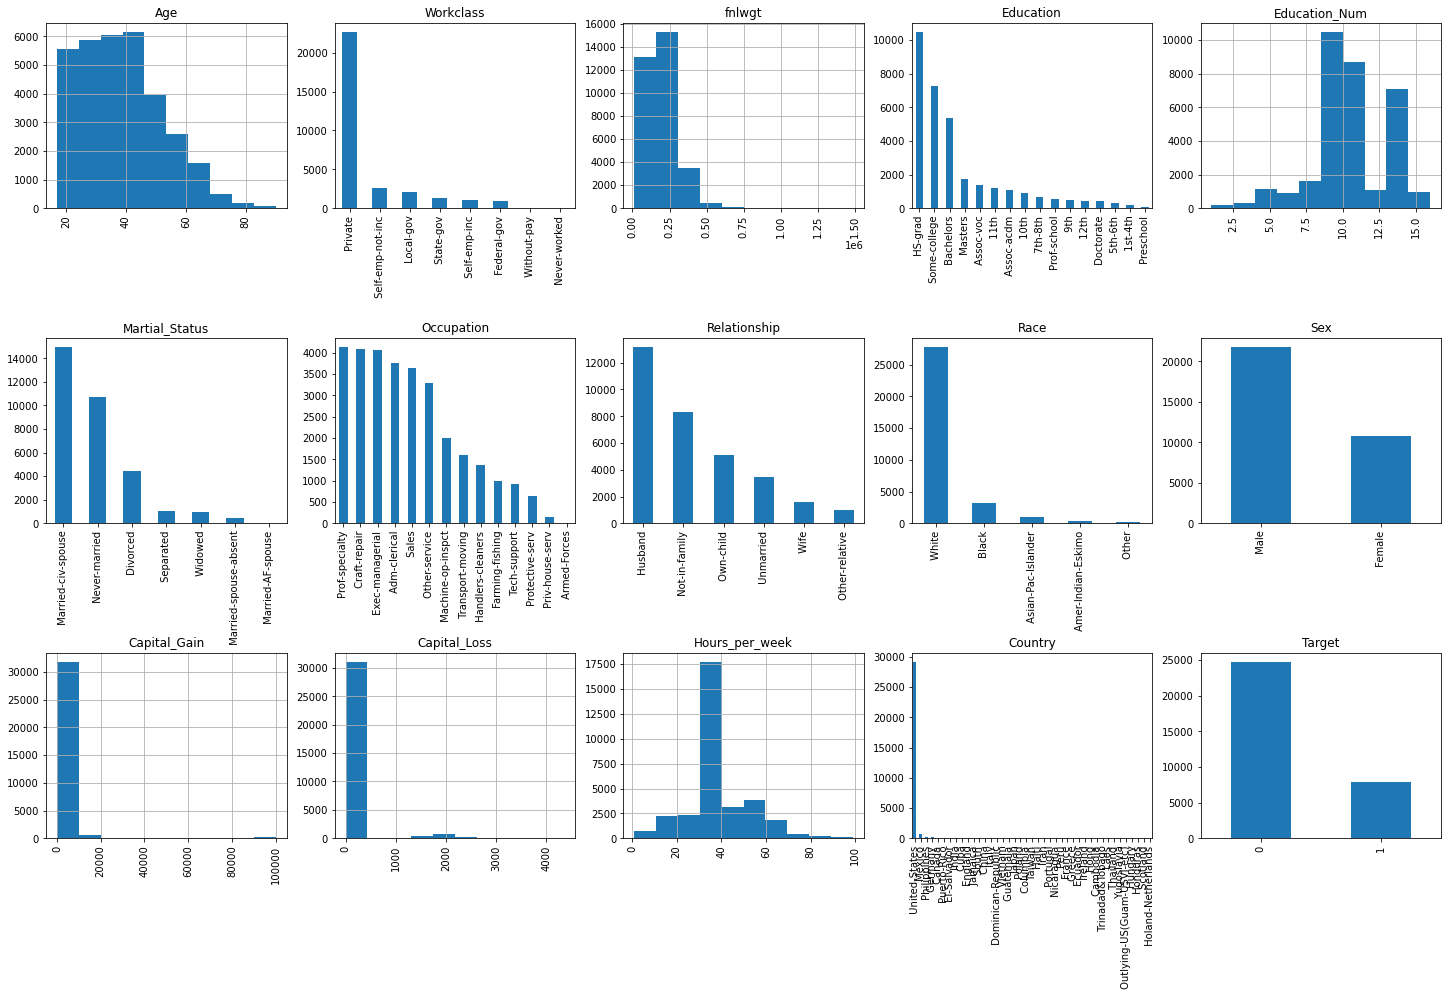

In [17]:
# Your code here

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


As you can see from the plots above our data is mostly concentrated in the USA with mostly male white 
people.This is a good thing to notice, as it may impact the conclusions we come to later.

### Calculate the percentage of adults from each country in the data *

In [18]:
# Your code here

(data_train["Country"].value_counts() / data_train.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 Philippines      0.006081
 Germany          0.004207
 Canada           0.003716
Name: Country, dtype: float64

```python
 89% of the samples are for people from the US. Mexico comes next with less than 2%.
```

### Check the data types of train and test data *

In [19]:
# Your code here

print(data_train.dtypes)
print(data_test.dtypes)

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object
Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object


```python
 in the test data, age is treated as type object and needs to be changed.
```

### the data type of age in the test data is object type, so will have to convert the data type of `Age` column in the test data to `int` type. 

In [20]:
# Your code here

data_test['Age'] = data_test['Age'].astype(int)

### Also cast all float features to int type to keep types consistent between our train and test data.

In [21]:
# Your code here

data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

### treat categorical and numerical data in different ways for cleaning the data and encoding, so will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [22]:
# Your code here

# choose categorical and continuous features from data

categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


###  already separated the numerical and categorical columns,will fill in missing data for continuous features with their median values, for categorical features with their mode

In [23]:
# Your code here

# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

### label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [24]:
# Your code here

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in categorical_columns:
    data_train[x] = le.fit_transform(data_train[x])
    data_test[x] = le.transform(data_test[x])

In [25]:
# Alternate way with a single line of code to encode data with categorical data without complicating if you want to use.

pd.get_dummies(data=data_train, columns = categorical_columns).shape

data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

data_train.shape

(32561, 15)

### Split train and test data into X_train ,y_train,X_test and y_test data

In [26]:
# Your code here

X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

In [57]:
X_train

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,3,7,2,12,5,4,0,38
32557,40,154374,9,0,0,40,3,11,2,6,0,4,1,38
32558,58,151910,9,0,0,40,3,11,6,0,4,4,0,38
32559,22,201490,9,0,0,20,3,11,4,0,3,4,1,38


In [80]:
y_train

       Target
0           0
1           0
2           0
3           0
4           0
...       ...
32556       0
32557       1
32558       0
32559       0
32560       1

[32561 rows x 1 columns]


###  train  data with Decision tree model then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [81]:
# Your code here

tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_test) 

In [82]:
# Your code here

# Check the accuracy score

print("Decision tree accuracy: ",accuracy_score(y_test,tree_predictions))

Decision tree accuracy:  0.839199066396413


###  accuracy is 84% without using parameter tuning Will try to increase  model accuracy by using Decision tree with parameter tuning
* Creating a dictionary with Key as `'max_depth'` and value as `range(2,11)` and saving as tree_params.
* Train decision tree (DecisionTreeClassifier(random_state = 17),tree_params) and find optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [83]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  


# Your code here

locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

### optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

In [30]:
# Your code here

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 8}
Best cross validaton score 0.8547342708270852


### Train decision tree with maximum depth of 8 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

In [84]:
# Your code here

tuned_tree = DecisionTreeClassifier(max_depth=8, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_test, tuned_tree_predictions))

Decision tree Accuracy after tuning:  0.8544929672624532


### Lets plot the decision tree and see its distibution of classes

*  tree.export_graphviz() module used to create the graphic visualization object of the learned tree classifier .Input the parameters tuned_tree, out_file=None, feature_names=X_train.columns, filled = True, class_names=['class_no','class_yes'] and save it as dot_data

*  pydotplus.graph_from_dot_data() module used to draw the graph

* To display the graph  saved the above created image into a file and displayed it using matplotlib as  Image(graph.create_png())

In [60]:
! pip install graphviz

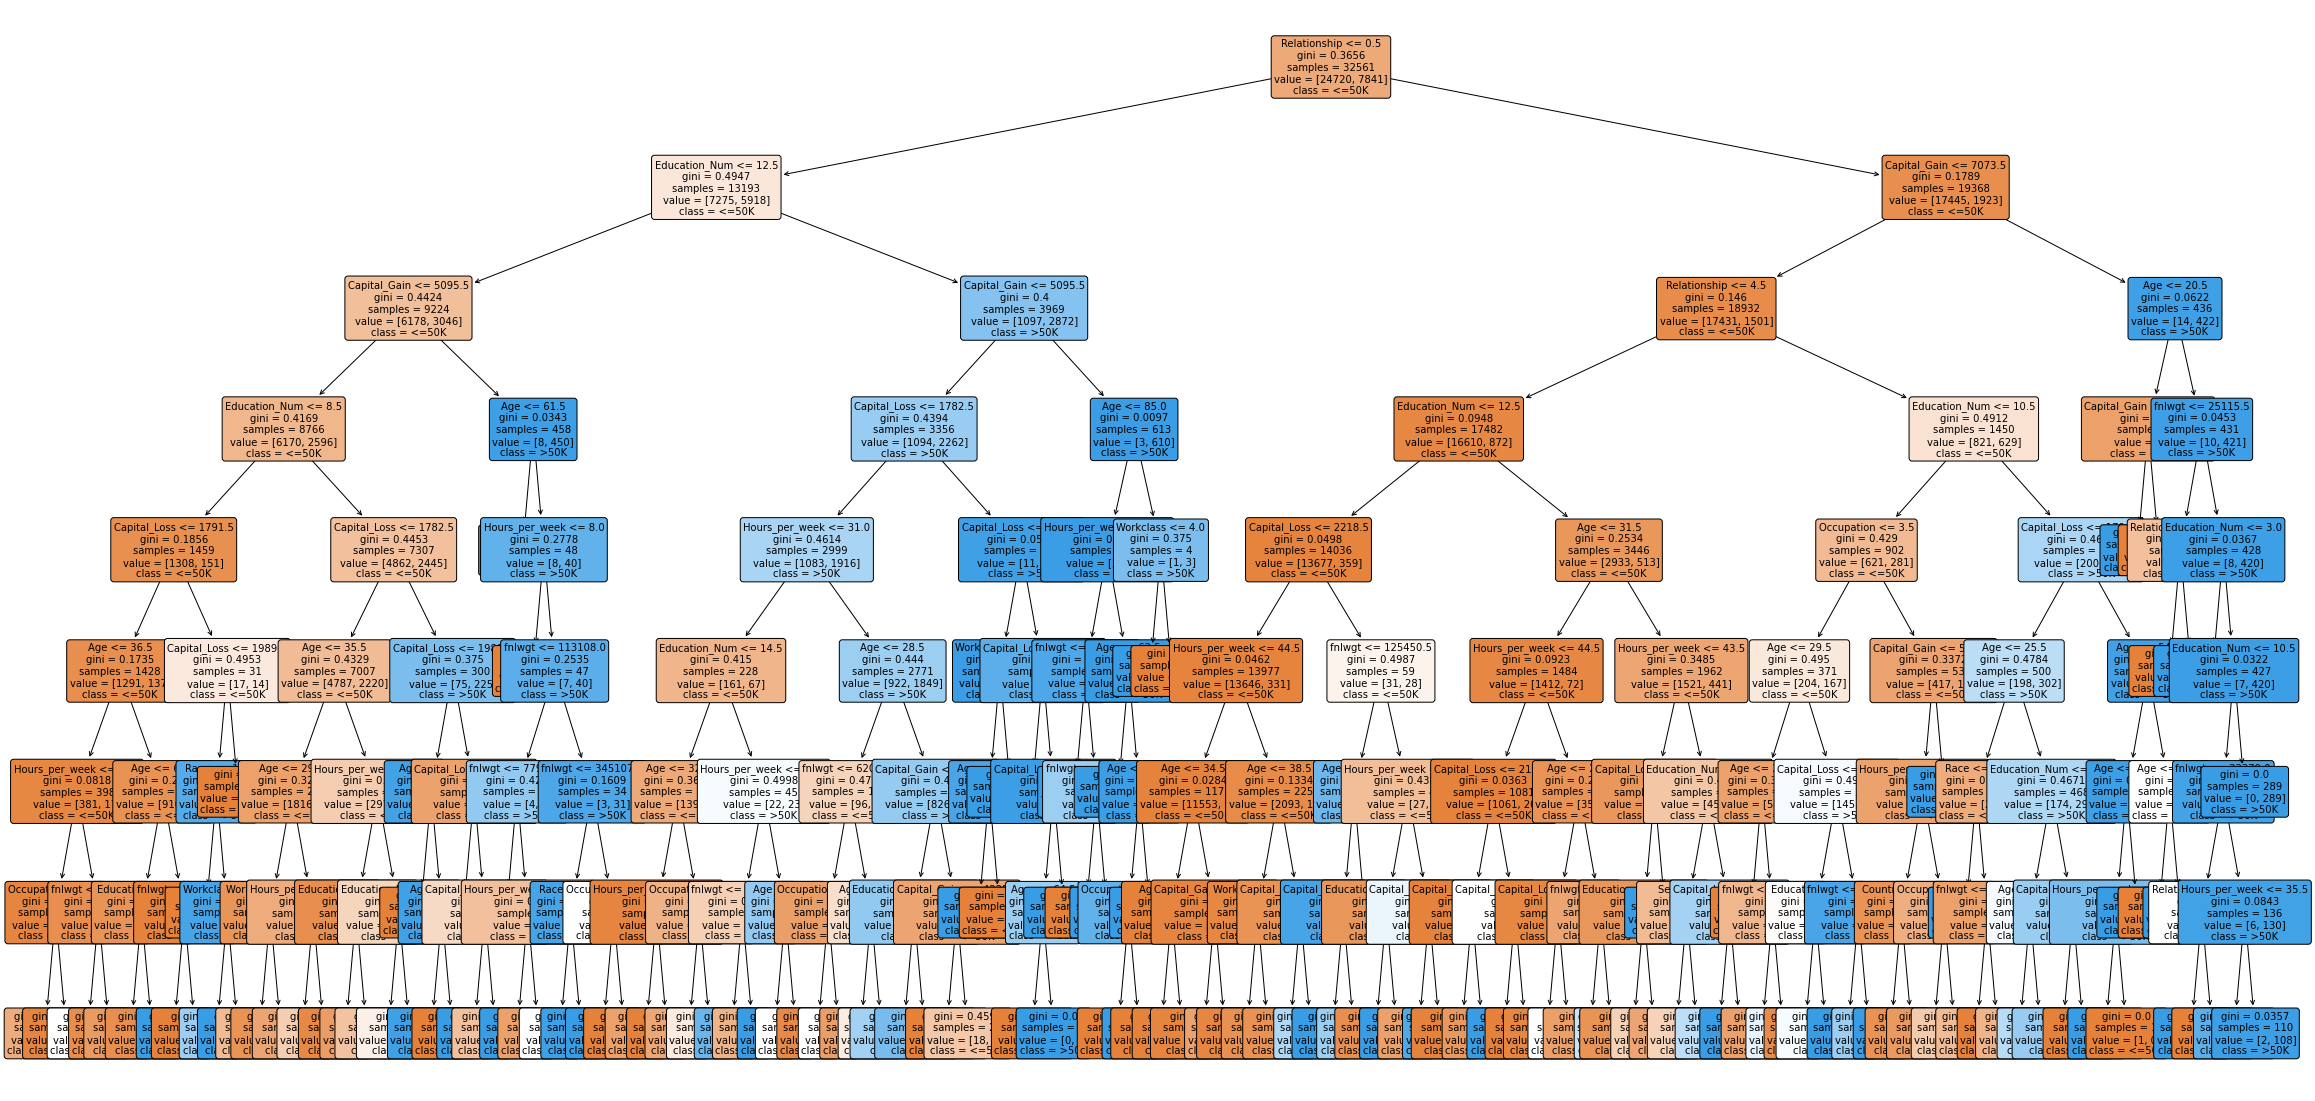

In [93]:
# Visualising the graph without the use of graphviz
#for visualizing tree 
from sklearn.tree import plot_tree
plt.figure(figsize = (40,20))
dec_tree = plot_tree(decision_tree=tuned_tree, feature_names = X_train.columns, 
                     class_names =["<=50K", ">50K"] , filled = True ,fontsize=10, precision = 4, rounded = True)

plt.savefig("one.png")